# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# weather_api_key

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alice springs
Processing Record 2 of Set 1 | zavoronezhskoye
Processing Record 3 of Set 1 | saurimo
Processing Record 4 of Set 1 | portland
Processing Record 5 of Set 1 | minas de marcona
Processing Record 6 of Set 1 | lompoc
Processing Record 7 of Set 1 | fale old settlement
Processing Record 8 of Set 1 | ust-nera
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | utrik
Processing Record 11 of Set 1 | khanbari
Processing Record 12 of Set 1 | semenivka
Processing Record 13 of Set 1 | mitu
Processing Record 14 of Set 1 | borujen
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | salacgriva
Processing Record 17 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | viedma
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 o

Processing Record 41 of Set 4 | nkurenkuru
City not found. Skipping...
Processing Record 42 of Set 4 | sonsorol village
City not found. Skipping...
Processing Record 43 of Set 4 | de aar
Processing Record 44 of Set 4 | anamosa
Processing Record 45 of Set 4 | newark
Processing Record 46 of Set 4 | anatuya
Processing Record 47 of Set 4 | gadzhiyevo
Processing Record 48 of Set 4 | dudinka
Processing Record 49 of Set 4 | bunbury
Processing Record 0 of Set 5 | dubbo
Processing Record 1 of Set 5 | al awjam
Processing Record 2 of Set 5 | baiao
Processing Record 3 of Set 5 | sisimiut
Processing Record 4 of Set 5 | khandyga
Processing Record 5 of Set 5 | sao tome
Processing Record 6 of Set 5 | magadan
Processing Record 7 of Set 5 | vize
Processing Record 8 of Set 5 | bethanie
Processing Record 9 of Set 5 | coahuayana de hidalgo
Processing Record 10 of Set 5 | hammerfest
Processing Record 11 of Set 5 | daru
Processing Record 12 of Set 5 | kodiak
Processing Record 13 of Set 5 | meadow lakes
Proce

Processing Record 35 of Set 8 | sechura
Processing Record 36 of Set 8 | carutapera
Processing Record 37 of Set 8 | lata
Processing Record 38 of Set 8 | gudalur
Processing Record 39 of Set 8 | onega
Processing Record 40 of Set 8 | quepos
Processing Record 41 of Set 8 | kavaratti
Processing Record 42 of Set 8 | fortaleza
Processing Record 43 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 44 of Set 8 | jurmala
Processing Record 45 of Set 8 | kidal
Processing Record 46 of Set 8 | taitung city
Processing Record 47 of Set 8 | lazaro cardenas
Processing Record 48 of Set 8 | ebaye
Processing Record 49 of Set 8 | malvan
Processing Record 0 of Set 9 | puerto ayacucho
Processing Record 1 of Set 9 | kristiansund
Processing Record 2 of Set 9 | haiku-pauwela
Processing Record 3 of Set 9 | villa gesell
Processing Record 4 of Set 9 | hami
Processing Record 5 of Set 9 | szentlorinc
Processing Record 6 of Set 9 | antsiranana
Processing Record 7 of Set 9 | qarah
Processing Record 8 o

Processing Record 25 of Set 12 | saint joseph
Processing Record 26 of Set 12 | zhangjiajie
Processing Record 27 of Set 12 | yaren
Processing Record 28 of Set 12 | bulnes
Processing Record 29 of Set 12 | saudarkrokur
Processing Record 30 of Set 12 | ha'il
Processing Record 31 of Set 12 | mossel bay
Processing Record 32 of Set 12 | berdigestyakh
Processing Record 33 of Set 12 | fonadhoo
City not found. Skipping...
Processing Record 34 of Set 12 | susuman
Processing Record 35 of Set 12 | taungoo
Processing Record 36 of Set 12 | bafq
Processing Record 37 of Set 12 | st. catharines
Processing Record 38 of Set 12 | villamontes
Processing Record 39 of Set 12 | severo-yeniseyskiy
Processing Record 40 of Set 12 | geroskipou
City not found. Skipping...
Processing Record 41 of Set 12 | pekan
Processing Record 42 of Set 12 | igrim
Processing Record 43 of Set 12 | nguigmi
Processing Record 44 of Set 12 | praia da vitoria
Processing Record 45 of Set 12 | barra
Processing Record 46 of Set 12 | qingda

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alice springs,-23.7000,133.8833,35.75,13,91,7.20,AU,1696235273
1,zavoronezhskoye,52.8801,40.5526,12.88,88,100,3.13,RU,1696235520
2,saurimo,-9.6608,20.3916,32.21,36,88,0.99,AO,1696235520
3,portland,45.5234,-122.6762,13.12,84,40,0.45,US,1696234955
4,minas de marcona,-15.2119,-75.1103,13.37,92,88,4.09,PE,1696235520


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alice springs,-23.7000,133.8833,35.75,13,91,7.20,AU,1696235273
1,zavoronezhskoye,52.8801,40.5526,12.88,88,100,3.13,RU,1696235520
2,saurimo,-9.6608,20.3916,32.21,36,88,0.99,AO,1696235520
3,portland,45.5234,-122.6762,13.12,84,40,0.45,US,1696234955
4,minas de marcona,-15.2119,-75.1103,13.37,92,88,4.09,PE,1696235520


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [9]:
city_data_df.head(2)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alice springs,-23.7000,133.8833,35.75,13,91,7.20,AU,1696235273
1,zavoronezhskoye,52.8801,40.5526,12.88,88,100,3.13,RU,1696235520


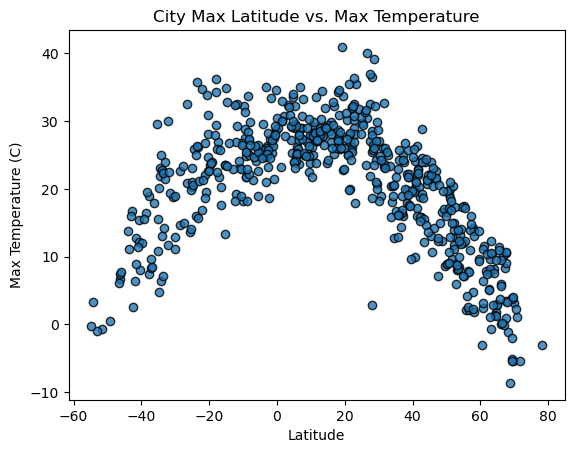

In [10]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
plt.scatter(latitude, temperature, edgecolors="black", alpha=.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Max Latitude vs. Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

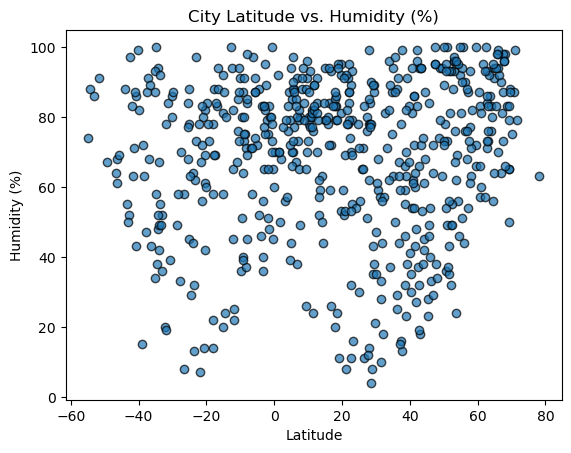

In [11]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(latitude, humidity, edgecolors = 'black', alpha = 0.7)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%)")

# plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

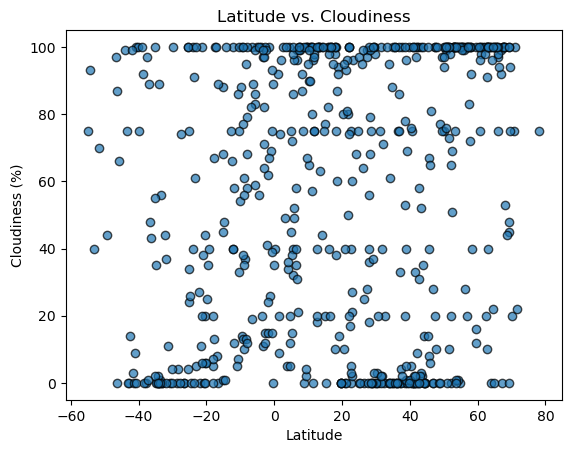

In [12]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(latitude, cloudiness, edgecolors = 'black', alpha = 0.7)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

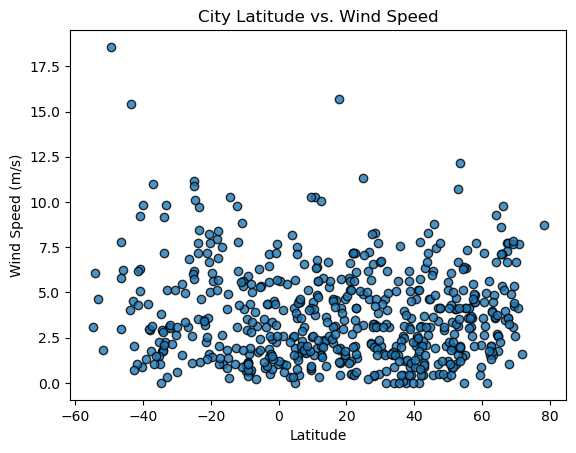

In [13]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude, wind_speed, edgecolors="black", alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,zavoronezhskoye,52.8801,40.5526,12.88,88,100,3.13,RU,1696235520
3,portland,45.5234,-122.6762,13.12,84,40,0.45,US,1696234955
5,lompoc,34.6391,-120.4579,12.74,87,0,2.06,US,1696235484
7,ust-nera,64.5667,143.2000,1.79,56,22,2.68,RU,1696235520
9,utrik,11.2278,169.8474,28.43,80,80,4.86,MH,1696235520


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alice springs,-23.7000,133.8833,35.75,13,91,7.20,AU,1696235273
2,saurimo,-9.6608,20.3916,32.21,36,88,0.99,AO,1696235520
4,minas de marcona,-15.2119,-75.1103,13.37,92,88,4.09,PE,1696235520
6,fale old settlement,-9.3852,-171.2468,27.56,80,100,2.92,TK,1696235520
8,port-aux-francais,-49.3500,70.2167,0.55,67,44,18.57,TF,1696235520


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8506312534379142


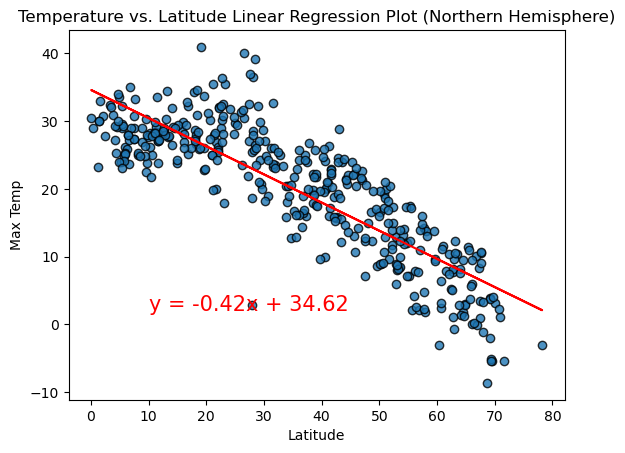

In [16]:
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_temp = northern_hemi_df["Max Temp"]
slope = linregress(north_lat, north_temp)
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build scatter plot
plt.scatter(north_lat, north_temp, edgecolors="black", alpha=.8)
plt.plot(north_lat, regress_values, "-r")
plt.annotate(line_eq,(10,2),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title ("Temperature vs. Latitude Linear Regression Plot (Northern Hemisphere)")


print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** Temperature vs. Latitude Linear Regression Plot (Northern Hemisphere)
- There seems to be a correlation Between the temperature and latitude without too many outliers
- As the latitude increases the temperature decreases displaying a decline trend

The r-value is 0.7231774597253154


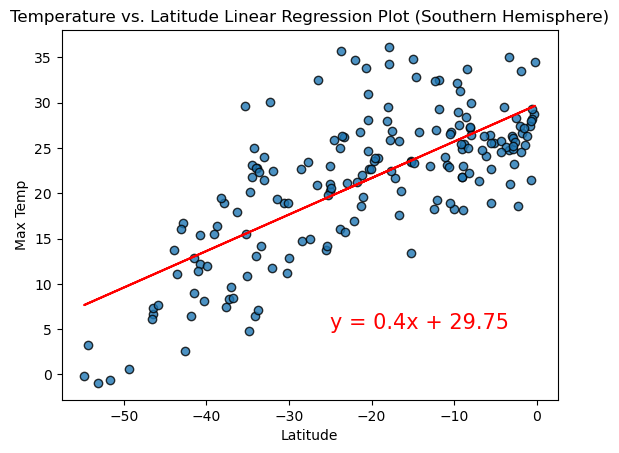

In [17]:
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_temp = southern_hemi_df["Max Temp"]
slope = linregress(south_lat, south_temp)
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build scatter plot
plt.scatter(south_lat, south_temp, edgecolors ="black", alpha=.8)
plt.plot(south_lat, regress_values, "-r")
plt.annotate(line_eq,(-25,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title ("Temperature vs. Latitude Linear Regression Plot (Southern Hemisphere)")

print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** Temperature vs. Latitude Linear Regression Plot (Southern Hemisphere)
- There seems to be a correlation between temperature and latitude
- As the latitude increases, so does the temperature within the southern hemisphere 
- This points to an incline trend as latitude increases opposite to the northern hemisphere's result

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.07398163084263469


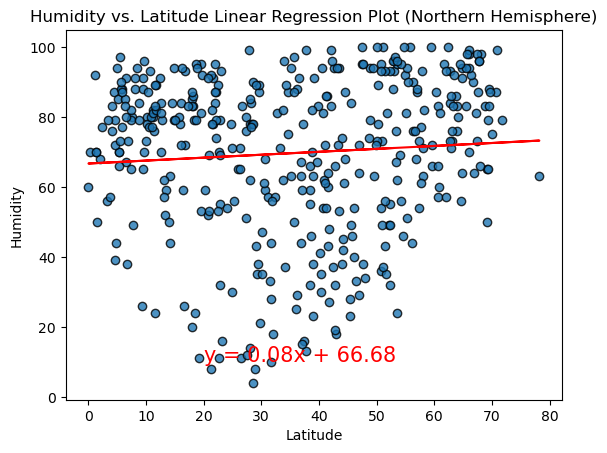

In [18]:
# Northern Hemisphere
# we have north_lat for x values
north_hum = northern_hemi_df['Humidity']

slope = linregress(north_lat, north_hum)
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_hum)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build Scatter plot
plt.scatter(north_lat, north_hum, edgecolors="black", alpha=.8)
plt.plot(north_lat, regress_values, "-r")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title ("Humidity vs. Latitude Linear Regression Plot (Northern Hemisphere)")


print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** Humidity vs. Latitude Linear Regression Plot (Northern Hemisphere)
- There seems to be a slight correlation leading into an incline trend within humidity and latitude 
- However I do not think that this correlation would lead to a proper analysis

The r-value is 0.06818556999196451


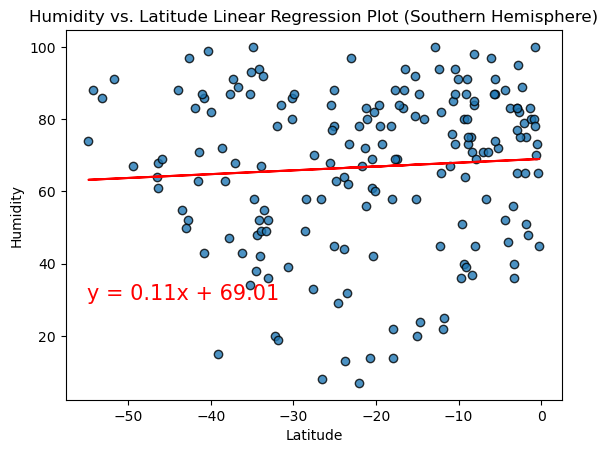

In [19]:
# Southern Hemisphere
# We have south_lat for the x values
south_hum = southern_hemi_df["Humidity"]
slope = linregress(south_lat, south_hum)
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_hum)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build scatter plot
plt.scatter(south_lat, south_hum, edgecolors ="black", alpha=.8)
plt.plot(south_lat, regress_values, "-r")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title ("Humidity vs. Latitude Linear Regression Plot (Southern Hemisphere)")

print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** Humidity vs. Latitude Linear Regression Plot (Southern Hemisphere)
- There seems to be a slight correlation leading into an incline trend within humidity and latitude 
- However I do not think that this correlation would lead to a proper analysis similar to the northern hemisphere
- I can conclude that both hemisphere have the similar trends in humidity and latitude

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.09761654941436886


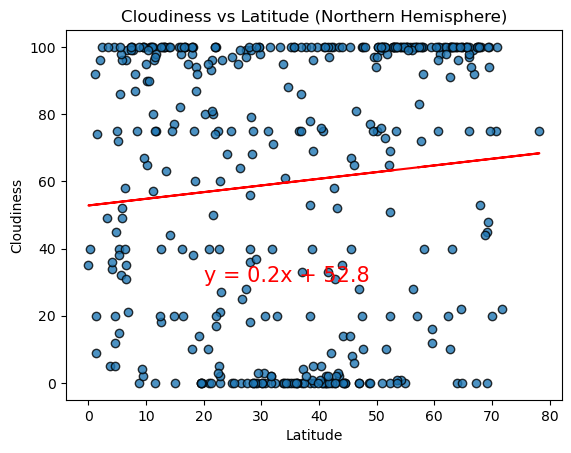

In [20]:
# Northern Hemisphere
# we have north_lat for x values
north_cloud = northern_hemi_df['Cloudiness']

slope = linregress(north_lat, north_cloud)
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloud)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build Scatter plot
plt.scatter(north_lat, north_cloud, edgecolors="black", alpha=.8)
plt.plot(north_lat, regress_values, "-r")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title ("Cloudiness vs Latitude (Northern Hemisphere)")


print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** Cloudiness vs Latitude (Northern Hemisphere)
- There seems to be a slight correlation leading into an incline trend within Cloudiness and latitude 
- However I do not think that this correlation would lead to a proper analysis since there seems to be too many variables

The r-value is 0.18533903541865426


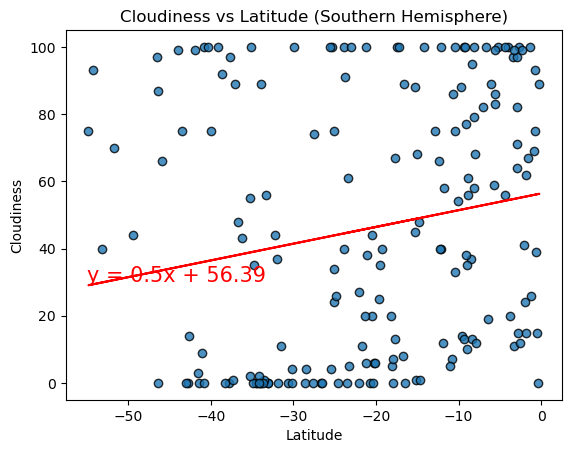

In [21]:
# Southern Hemisphere
# We have south_lat for the x values
south_cloud = southern_hemi_df["Cloudiness"]
slope = linregress(south_lat, south_cloud)
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build scatter plot
plt.scatter(south_lat, south_cloud, edgecolors ="black", alpha=.8)
plt.plot(south_lat, regress_values, "-r")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title ("Cloudiness vs Latitude (Southern Hemisphere)")

print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** Cloudiness vs Latitude (Southern Hemisphere)
- There seems to be a slight correlation leading into an incline trend within Cloudiness and latitude 
- However I do not think that this correlation would lead to a proper analysis similar to the northern hemisphere's result
- I can conclude that both hemisphere have the similar trends in humidity and latitude

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.11480288226580264


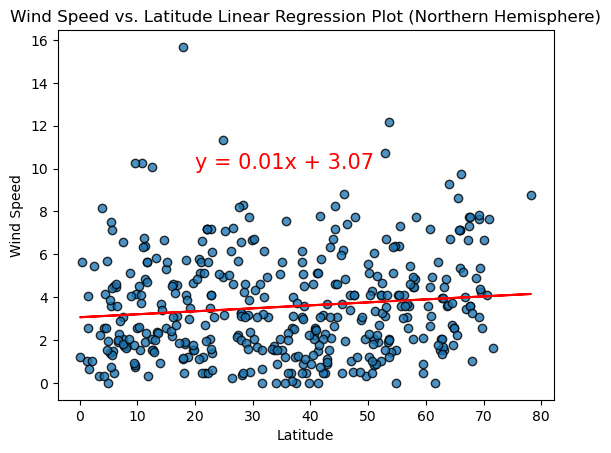

In [22]:
# Northern Hemisphere
# we have north_lat for x values
north_wind = northern_hemi_df['Wind Speed']

slope = linregress(north_lat, north_wind)
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build Scatter plot
plt.scatter(north_lat, north_wind, edgecolors="black", alpha=.8)
plt.plot(north_lat, regress_values, "-r")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title ("Wind Speed vs. Latitude Linear Regression Plot (Northern Hemisphere)")


print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** Wind Speed vs. Latitude Linear Regression Plot (Northern Hemisphere)
- There seems to be a correlation leading into an decline trend with Wind Speed and latitude 
- The wind speed seems to stay stagnant despite the increase in latitude

The r-value is -0.1893374822460468


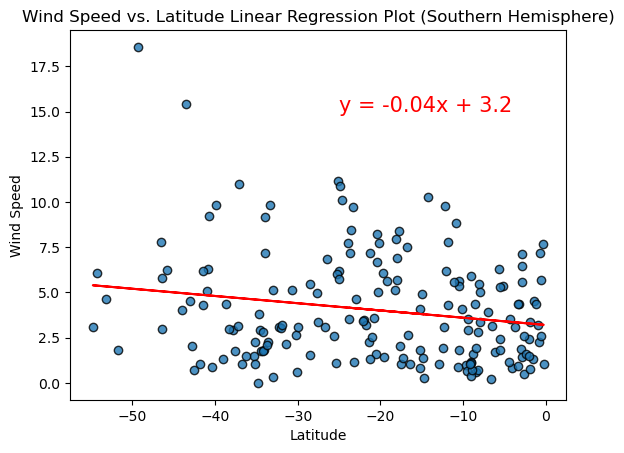

In [23]:
# Southern Hemisphere
# We have south_lat for the x values
south_wind = southern_hemi_df["Wind Speed"]
slope = linregress(south_lat,south_wind)
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build scatter plot
plt.scatter(south_lat, south_wind, edgecolors ="black", alpha=.8)
plt.plot(south_lat, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title ("Wind Speed vs. Latitude Linear Regression Plot (Southern Hemisphere)")

print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** Wind Speed vs. Latitude Linear Regression Plot (Southern Hemisphere)
- There seems to be a correlation leading into an decline trend with Wind Speed and latitude 
- The wind speed seems to stay stagnant despite the negative latitude